In [1]:
import sys
sys.version

'2.7.14 |Anaconda, Inc.| (default, Oct 16 2017, 17:29:19) \n[GCC 7.2.0]'

In [1]:
import sys, traceback
import argparse
import string
import cv2
import numpy as np
MODULE_PATH = '/home/iizuka/workspace/py2/lib'
PLANTCV_PATH = '/home/iizuka/workspace/py2/lib/plantcv'
sys.path.append(MODULE_PATH)
sys.path.append(PLANTCV_PATH)
import plantcv as pcv
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
#IMG_DATABASE_PATH = "/home/iizuka/ImageDatabase/aerial_image"
IMG_DATABASE_PATH = "/home/iizuka/workspace/py2/imgs"


In [4]:

img_file = IMG_DATABASE_PATH + '/1511214421.jpg'
img, path, filename = pcv.readimage(img_file)

In [3]:
pcv.__file__


'/home/iizuka/workspace/py2/lib/plantcv/plantcv/__init__.pyc'

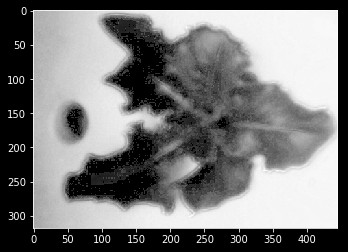

In [5]:
device = 0
debug = 'plot'
device, s = pcv.rgb2gray_hsv(img, 's', device, debug)

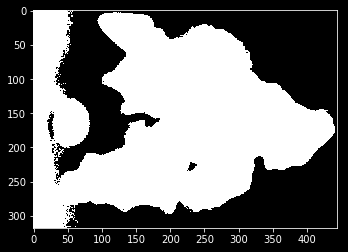

In [6]:
device, s_thresh = pcv.binary_threshold(s, 200, 255, 'dark', device, debug)

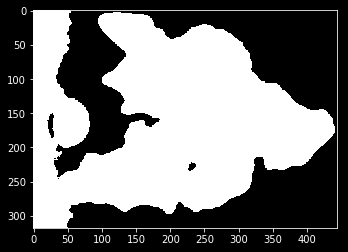

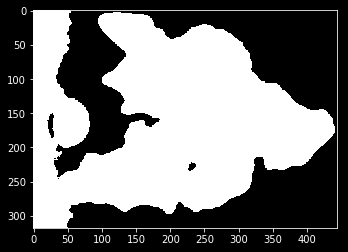

In [6]:
device, s_mblur = pcv.median_blur(s_thresh, 5, device, debug)
device, s_cnt = pcv.median_blur(s_thresh, 5, device, debug)

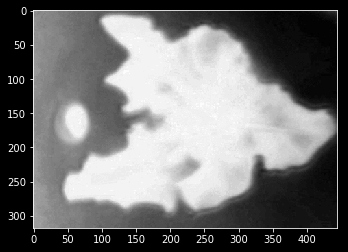

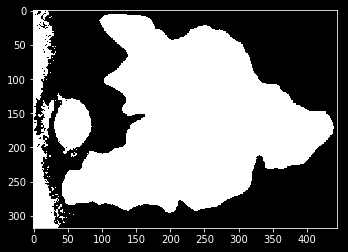

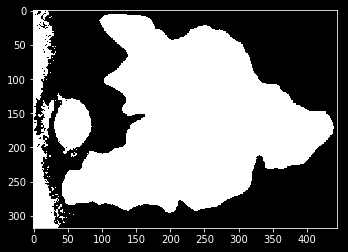

In [7]:
# Convert RGB to LAB and extract the Blue channel
device, b = pcv.rgb2gray_lab(img, 'b', device, debug)

# Threshold the blue image
device, b_thresh = pcv.binary_threshold(b, 100, 255, 'light', device, debug)
device, b_cnt = pcv.binary_threshold(b, 100, 255, 'light', device, debug)

# Fill small objects
#device, b_fill = pcv.fill(b_thresh, b_cnt, 10, device, debug)

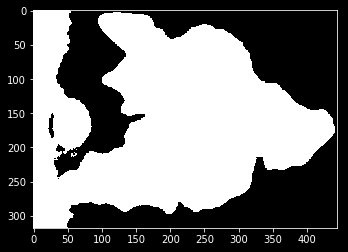

In [8]:
# Join the thresholded saturation and blue-yellow images
device, bs = pcv.logical_or(s_mblur, b_cnt, device, debug)

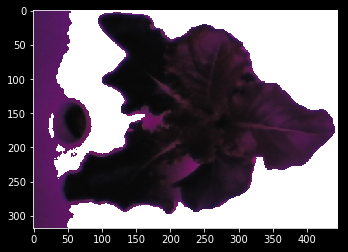

In [9]:
# Apply Mask (for vis images, mask_color=white)
device, masked = pcv.apply_mask(img, bs, 'white', device, debug)

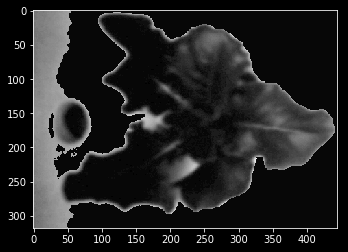

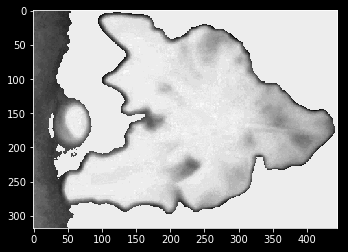

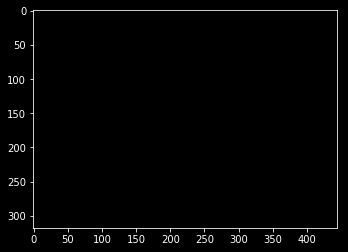

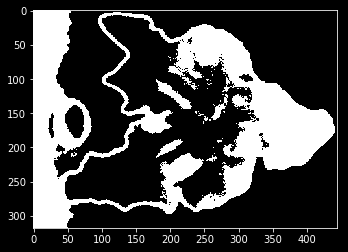

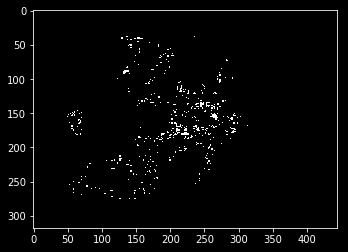

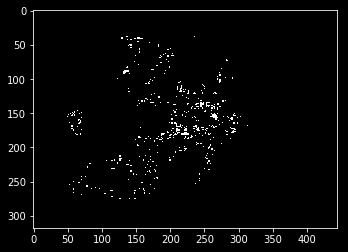

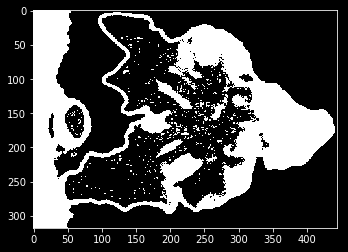

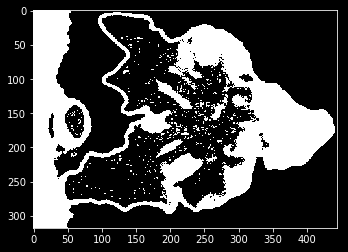

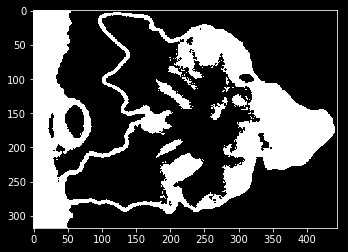

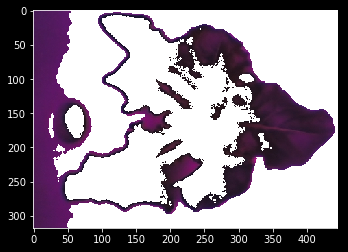

In [10]:
# Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
device, masked_a = pcv.rgb2gray_lab(masked, 'a', device, debug)
device, masked_b = pcv.rgb2gray_lab(masked, 'b', device, debug)

# Threshold the green-magenta and blue images
device, maskeda_thresh = pcv.binary_threshold(masked_a, 115, 255, 'dark', device, debug)
device, maskeda_thresh1 = pcv.binary_threshold(masked_a, 135, 255, 'light', device, debug)
device, maskedb_thresh = pcv.binary_threshold(masked_b, 128, 255, 'light', device, debug)

# Join the thresholded saturation and blue-yellow images (OR)
device, ab1 = pcv.logical_or(maskeda_thresh, maskedb_thresh, device, debug)
device, ab = pcv.logical_or(maskeda_thresh1, ab1, device, debug)
device, ab_cnt = pcv.logical_or(maskeda_thresh1, ab1, device, debug)

# Fill small objects
device, ab_fill = pcv.fill(ab, ab_cnt, 200, device, debug)

# Apply mask (for vis images, mask_color=white)
device, masked2 = pcv.apply_mask(masked, ab_fill, 'white', device, debug)

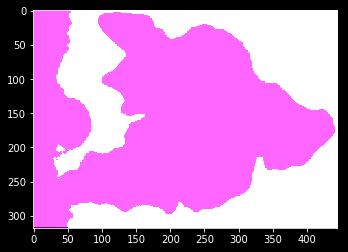

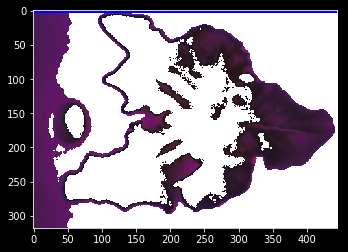

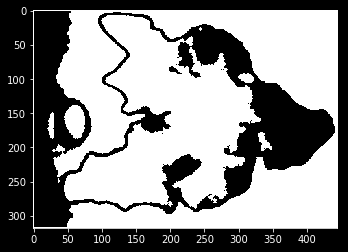

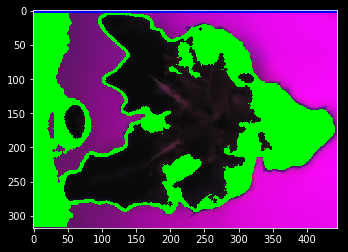

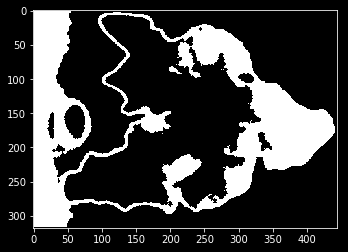

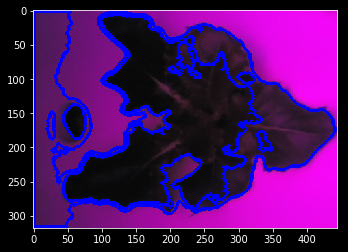

In [11]:
device, id_objects,obj_hierarchy = pcv.find_objects(masked2, ab_fill, device, debug)

device, roi1, roi_hierarchy= pcv.define_roi(masked2, 'rectangle', device, None, 'default', debug, True, 550, 0, -500, -1900)
device,roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img, 'partial', roi1, roi_hierarchy, id_objects, obj_hierarchy, device, debug)
device, obj, mask = pcv.object_composition(img, roi_objects, hierarchy3, device, debug)


In [ ]:
outfile=False
if args.writeimg==True:
    outfile=args.outdir+"/"+filename

# Find shape properties, output shape image (optional)
device, shape_header, shape_data, shape_img = pcv.analyze_object(img, args.image, obj, mask, device, debug, args.outdir + '/' + filename)

# Shape properties relative to user boundary line (optional)
device, boundary_header, boundary_data, boundary_img1 = pcv.analyze_bound(img, args.image, obj, mask, 1680, device, debug, args.outdir + '/' + filename)

# Determine color properties: Histograms, Color Slices and Pseudocolored Images, output color analyzed images (optional)
device, color_header, color_data, color_img = pcv.analyze_color(img, args.image, kept_mask, 256, device, debug, 'all', 'v', 'img', 300, args.outdir + '/' + filename)

# Write shape and color data to results file
result=open(args.result,"a")
result.write('\t'.join(map(str,shape_header)))
result.write("\n")
result.write('\t'.join(map(str,shape_data)))
result.write("\n")
for row in shape_img:  
    result.write('\t'.join(map(str,row)))
    result.write("\n")
result.write('\t'.join(map(str,color_header)))
result.write("\n")
    result.write('\t'.join(map(str,color_data)))
    result.write("\n")
    for row in color_img:
        result.write('\t'.join(map(str,row)))
        result.write("\n")
    result.close()

In [ ]:
cv2.__version__